In [1]:
pwd # location

'/home/jupyter/ANNA'

In [2]:
import pandas as pd
import numpy as np

import waterfall_chart
import plotly.graph_objects as go

# Sheet: Consolidated Balance Sheet data
## Preparatory Steps

### - Lloyds

##### Open sheet on assets

In [3]:
# Read Lloyds Consolidated Balance Sheet

file_Lloyds_location = 'Lloyds Banking Gropu 2020 EOY.xlsx'
df_l = pd.read_excel(file_Lloyds_location, sheet_name = '37') # , skiprows=[0,1,2,3,4]
df_l.shape

(28, 16)

In [4]:
## Cleaning dataset and keep useful columns

df_l = df_l.dropna(subset=['Unnamed: 8'])
df_l = df_l[['CONSOLIDATED BALANCE SHEET','Unnamed: 8','Unnamed: 10']].drop([1,2,3])
df_l.head()

CONSOLIDATED BALANCE SHEET Unnamed: 8 Unnamed: 10
6                  Cash and balances at central banks      73257       55130
7        Items in the course of collection from banks        299         313
8   Financial assets at fair value through profit ...     171626      160189
9                    Derivative financial instruments      29613       26369
10                        Loans and advances to banks      10746        9775

In [5]:
# Renaming columns
df_l = df_l.rename(columns={'CONSOLIDATED BALANCE SHEET': 'Cons_balance_sheet','Unnamed: 8': '2020','Unnamed: 10': '2019'})

# Resetting index
df_l = df_l.reset_index().drop(columns=['index'])
df_l.head()

Cons_balance_sheet    2020    2019
0                 Cash and balances at central banks   73257   55130
1       Items in the course of collection from banks     299     313
2  Financial assets at fair value through profit ...  171626  160189
3                   Derivative financial instruments   29613   26369
4                        Loans and advances to banks   10746    9775

In [6]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cons_balance_sheet  20 non-null     object
 1   2020                20 non-null     object
 2   2019                20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


##### Open sheet on liabilities and equity

In [7]:
# Read Lloyds Consolidated Balance Sheet (CONTINUED)

file_Lloyds_location = 'Lloyds Banking Gropu 2020 EOY.xlsx'
df_l_2 = pd.read_excel(file_Lloyds_location, sheet_name = '38') # , skiprows=[0,1,2,3,4]
df_l_2.shape

(38, 10)

In [8]:
df_l_2.head()

CONSOLIDATED BALANCE SHEET (CONTINUED)  Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0                                    NaN         NaN         NaN         NaN   
1                                    NaN         NaN         NaN         NaN   
2                                    NaN         NaN         NaN         NaN   
3                                    NaN         NaN         NaN         NaN   
4                                    NaN         NaN         NaN         NaN   

   Unnamed: 4  Unnamed: 5  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  
0         NaN         NaN         NaN        NaN        NaN        NaN  
1         NaN         NaN         NaN        NaN        NaN        NaN  
2         NaN         NaN         NaN  At 31 Dec        NaN  At 31 Dec  
3         NaN         NaN         NaN       2020        NaN       2019  
4         NaN         NaN         NaN         £m                    £m

In [9]:
# Cleaning dataset and keep useful columns

df_l_2 = df_l_2.dropna(subset=['Unnamed: 7']).drop([2,3,4]).rename(\
                        columns={'CONSOLIDATED BALANCE SHEET (CONTINUED)': 'Cons_balance_sheet','Unnamed: 7': '2020','Unnamed: 9': '2019'})
df_l_2 = df_l_2[['Cons_balance_sheet','2020','2019']]
df_l_2.head()

Cons_balance_sheet    2020    2019
8                                 Deposits from banks   31465   28179
9                                   Customer deposits  460068  421320
10           Items in course of transmission to banks     306     373
11  Financial liabilities at fair value through pr...   22646   21486
12                   Derivative financial instruments   27313   25779

In [10]:
# df liabilities

df_liab = df_l_2.loc[8:23,].reset_index(drop=True)
df_liab

Cons_balance_sheet    2020    2019
0                                 Deposits from banks   31465   28179
1                                   Customer deposits  460068  421320
2            Items in course of transmission to banks     306     373
3   Financial liabilities at fair value through pr...   22646   21486
4                    Derivative financial instruments   27313   25779
5                                Notes in circulation    1305    1079
6                            Debt securities in issue   87397   97689
7   Liabilities arising from insurance contracts a...  116060  111449
8   Liabilities arising from non-participating inv...   38452   37459
9                                   Other liabilities   20347   20333
10                     Retirement benefit obligations     245     257
11                            Current tax liabilities      31     187
12                           Deferred tax liabilities      45      44
13                                  Other provisions     1915    3323
14                           Subordinated liabilities   14261   17130
15                                  Total liabilities  821856  786087

In [11]:
# df equity

df_eq = df_l_2.loc[26:34,].reset_index(drop=True)
df_eq

Cons_balance_sheet   2020   2019
0                                     Share capital   7084   7005
1                             Share premium account  17863  17751
2                                   Other reserves   13747  13695
3                                  Retained profits   4584   3246
4                              Shareholders’ equity  43278  41697
5                          Other equity instruments   5906   5906
6  Total equity excluding non-controlling interests  49184  47603
7                         Non-controlling interests    229    203
8                                      Total equity  49413  47806

### NatWest

In [12]:
# Read NatWest Consolidated Balance Sheet

file_NatWest_location = 'NatWest Group 2020 EOY.xlsx'
df_n = pd.read_excel(file_NatWest_location, sheet_name = '1.2 - Balance Sheet')
df_n.shape

(77, 16)

In [13]:
# Cleaning dataset

df_n = df_n.dropna(subset=['Unnamed: 5'])
df_n = df_n.drop([3,4,5])
df_n.columns

Index(['Unnamed: 0', 'Highlights', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [14]:
df_n.head()

Unnamed: 0                              Highlights  Unnamed: 2  \
8          NaN  Cash and balances at central banks (1)         NaN   
9          NaN                          Trading assets         NaN   
10         NaN                             Derivatives         NaN   
11         NaN                     Settlement balances         NaN   
12         NaN     Loans to banks - amortised cost (1)         NaN   

    Unnamed: 3  Unnamed: 4 Unnamed: 5  Unnamed: 6 Unnamed: 7 Unnamed: 8  \
8          NaN         NaN      91368         NaN      86940      89018   
9          NaN         NaN      75119         NaN      89101      85364   
10         NaN         NaN     133349         NaN     134079     145594   
11         NaN         NaN       2928         NaN      13556       8438   
12         NaN         NaN      10476         NaN       9902       9297   

   Unnamed: 9 Unnamed: 10  Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
8       87458       80993          NaN       81085      105242      111681   
9       91605       76745          NaN       81843       72402       70820   
10     175760      150029          NaN      208734      183419      164311   
11      12962        4387          NaN        9840        7806       10947   
12       9234        7554          NaN        9306        8011        6571   

   Unnamed: 15  
8       124489  
9        68990  
10      166523  
11        2297  
12        6955

In [15]:
# Select subset of data and rename columns

df_n = df_n[['Highlights','Unnamed: 10','Unnamed: 15']].rename(columns={'Highlights': 'Cons_balance_sheet','Unnamed: 10': '2019','Unnamed: 15': '2020'})

In [16]:
# Reset index
df_n = df_n.reset_index().drop(columns=['index'])

In [17]:
# NatWest Assets

df_n = df_n.loc[0:9,:]
df_n

Cons_balance_sheet    2019    2020
0  Cash and balances at central banks (1)   80993  124489
1                          Trading assets   76745   68990
2                             Derivatives  150029  166523
3                     Settlement balances    4387    2297
4     Loans to banks - amortised cost (1)    7554    6955
5     Loans to customers - amortised cost  326947  360544
6                  Other financial assets   61452   55148
7                       Intangible assets    6622    6655
8                            Other assets    8310    7890
9                            Total assets  723039  799491

## Visualisation

#### (3) Third visualisation: (carry on the count on 'cons_income_stat.ipynb')
The scope is to compare 'Assets' and components between Lloyds and Natwest on 2019 and 2020.

In [18]:
# Preparation of the set of data use for the visulaisation

df_l = df_l.drop([4,5,6]).reset_index().drop(columns=['index'])
df_l.head()

Cons_balance_sheet    2020    2019
0                 Cash and balances at central banks   73257   55130
1       Items in the course of collection from banks     299     313
2  Financial assets at fair value through profit ...  171626  160189
3                   Derivative financial instruments   29613   26369
4                 Financial assets at amortised cost  514994  510307

In [19]:
df_l

Cons_balance_sheet    2020    2019
0                  Cash and balances at central banks   73257   55130
1        Items in the course of collection from banks     299     313
2   Financial assets at fair value through profit ...  171626  160189
3                    Derivative financial instruments   29613   26369
4                  Financial assets at amortised cost  514994  510307
5   Financial assets at fair value through other c...   27603   25092
6        Investments in joint ventures and associates     296     304
7                                           Goodwill     2320    2324
8                          Value of in-force business    5617    5558
9                             Other intangible assets    4140    3808
10                      Property, plant and equipment   11754   13104
11                            Current tax recoverable     660       7
12                                Deferred tax assets    2741    2666
13                          Retirement benefit assets    1714     681
14  Assets arising from contracts held with reinsu...   20385   23567
15                                       Other assets    4250    4474
16                                       Total assets  871269  833893

In [20]:
# Reducing longness of 'Cons_balance_sheet' description

df_l['Cons_balance_sheet'] = df_l['Cons_balance_sheet'].str.slice(start=0, stop=45, step=1)

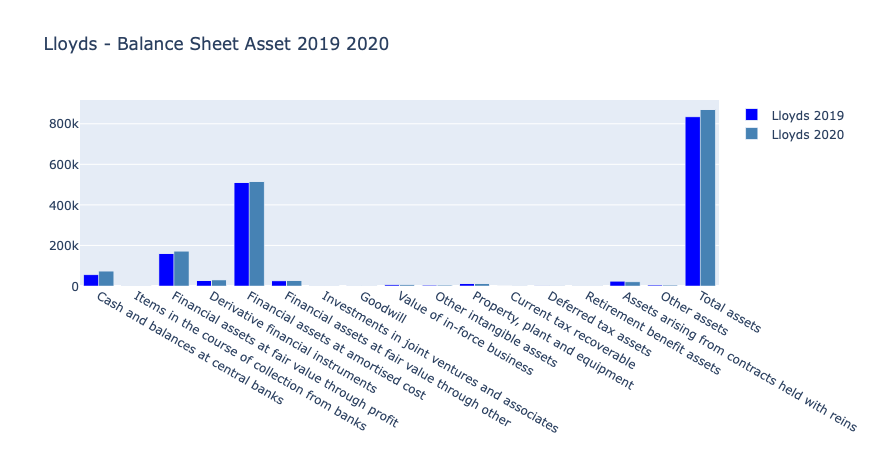

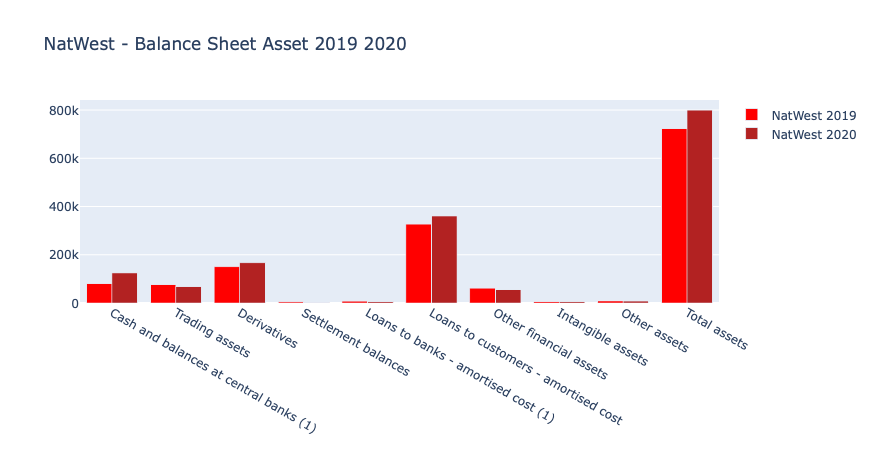

In [21]:
fig = go.Figure(data=[
    go.Bar(name='Lloyds 2019', x=df_l['Cons_balance_sheet'], y=df_l['2019'], marker_color='blue'),
    go.Bar(name='Lloyds 2020', x=df_l['Cons_balance_sheet'], y=df_l['2020'], marker_color='steelblue')
])

fig.update_layout(barmode='group',\
                  title = 'Lloyds - Balance Sheet Asset 2019 2020',
    #xaxis = go.layout.XAxis(
     #   tickangle = 45
    #)
)             
    
fig.show()


fig = go.Figure(data=[
   go.Bar(name='NatWest 2019', x=df_n['Cons_balance_sheet'], y=df_n['2019'], marker_color='red' ),
   go.Bar(name='NatWest 2020', x=df_n['Cons_balance_sheet'], y=df_n['2020'], marker_color='firebrick')
])

fig.update_layout(barmode='group',\
                  title = 'NatWest - Balance Sheet Asset 2019 2020')


fig.show()

Comment Fig(3): The above visualisations gives details on the composition of 'Assets' on the analysed years 2019, 2020 and for both Groups.
In particular, the end-users, can notice, e.g.:
- Lloyds reports a larger number of components
- moving the mouse above 'Total assets' in both charts, we can see that Lloyds presents assets higher that NatWest for both 2019 and 2020
- For Lloyds the component with higher impact on the total assets value is 'Financial assets at amortised cost'. For NatWest is 'Loans to customers - amortised cost'
- for Lloyds, component 'Items in the course of collect' has small values (299£m in 2020 and 313£m in 2019) compared to other components (in the chart its impact is almost not visible)


Also, moving the mouse over the chart, the end-user can:
- see all the quantities
- zoom specific part of the chart

Please notice that this function is available when the file is used into Python/Jupyter/... and not directly in GitLab.